**Ziyi Zhang 1005282720**

# Homework #1: AB-testing<br>and the Multi-Armed Bayesian Bandit

### You have three choices... choose wisely, my friends...


|Option|The "Red" one|The "Blue" one|The "Other" one|
|-|-|-|-|
|Unknown Probability of Success|$\theta_A$ | $\theta_B$ | $\theta_C$ |

$$p(\theta_j|x_j,n_j) \propto \theta^{x_j+\alpha_j-1}(1-\theta_j)^{n-x+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$

- Try one out, and collect that data update...
    - What's the data?
    - What's the update for the posterior in question?
- Which one of the three choices will you try out? How will you choose? 


- Hints: <u>You can use *simulation* to find out the *relative belief* (i.e., probability) that each of the choices is the best.</u> Posterior distributions characterize your beliefs about the parameters $\theta_A, \theta_B$ and $\theta_C$. What can you learn by repeatedly sampling values from the posterior distribution while comparing the values of each triplet? If you know the chances that A, B, and C are the best choice, how could you balance ***exploration versus exploitation*** when choosing which of the possible options to collect the next data point on next?


**Solution:**

In the formula that was provided above, we can note that it is a Bayesian update equation for a beta distribution. The posterior distribution $p(\theta_j|x_j,n_j)$ is proportional to the likelihood $\theta^{x_j+\alpha_j-1}(1-\theta_j)^{n-x+\beta_j-1}$. Given this likelihood and assuming a beta prior, the posterior distribution is also a beta distribution.

When we try one option (A, B, or C), we collect data on success and failures. The data $x_j$ is the number of successes, and $n_j-x_j$ is the number of failures for the option $j$, where $j$ can be A, B, or C.

After collecting the data, we update the pramaters of our beta distribution: the new alpha ($\alpha_{new}$) is the old alpha ($\alpha_{old}$) plus the number of successes ($x$), and the new beta ($\beta_{new}$) is the old beta ($\beta_{old}$) plus the number of failures ($n-x$). 

In order to decide on which option to try, it can be based on a strategy that balances exploration (trying out different options to learn more about their true success rates) and exploration (choosing the option that currently seems best based on the data collected).

Then by simulating the process of sampling from the posterior distributions for each option, we can estimate the relative belief (or probability) that each option is the best. This involves drawing samples from the beta distributions for each option and seeing which one is highest most often.

In [10]:
from scipy import stats
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt

Let's assume that the true probabilities of success for options A, B, and C are 0.3, 0.5, 0.7, respectively. Note: our algorithm doesn't know these values.

We first want to initialize the prior distribution for A, B, and C for a beta distribution with alpha and beta parameters. Since there's an unknown probability of success, then assuming we have no prior information which represents uniform prior, we can set the initial parameters (alpha, beta) to (1, 1).

For each trial, we sample a value from the posterior distributions for each option. We select the option that has the highest sampled value for the trial. Then we update the alpha and beta parameters of the chosen option's beta distribution base on the observed outcome (success or failure).

Lastly, after simulating through all the trials, the posterior distributions of each option will be plotted for visualization. 

In [11]:
# Set seed
np.random.seed(365)

# True probabilities for each option
true_probs = {
    'A': 0.3,
    'B': 0.5,
    'C': 0.7
}
# Initial beta parameters to turn beta distribution into uniform distribution
a = 1
b = 1

# Initialize priors
priors = {key: beta(a, b) for key in true_probs}

# Functions to simulate a trial
def simulate_bandit(prob):
    """
    Simulate the bandit for the given option.
    Return 1 if success, 0 if failure
    """
    return np.random.rand() < prob

# Function to update the posterior
def update_posterior(option, result):
    """
    Update the alpha and beta parameters of the beta distribution
    """
    a, b = priors[option].args
    priors[option] = beta(a + result, b + 1 - result)

In [13]:
# Simulating parameters

# Number of sims
N = 100

# Trackers for the choices made
choices = []

# Simulation loop
for trial in range(N):
    # Sample from the current posteriors
    samples = {key: priors[key].rvs() for key in priors}
    choice = max(samples, key=samples.get)
    choices.append(choice)
    
    # Run a trial and update the posterior
    result = simulate_bandit(true_probs[choice])
    update_posterior(choice, result)

    # Print the first 10 trials for visualization
    if trial < 10:
        print(f"Trial {trial + 1}: Option {choice} chosen (Sampled probabilities - {samples})")

# Final alpha and beta values for each option
final_params = {key: (priors[key].args[0], priors[key].args[1]) for key in priors}
choices, final_params

Trial 1: Option A chosen (Sampled probabilities - {'A': 0.7373040212223705, 'B': 0.2620334976454369, 'C': 0.5646603127831447})
Trial 2: Option C chosen (Sampled probabilities - {'A': 0.7084566669621566, 'B': 0.18937964751872255, 'C': 0.8301732639587269})
Trial 3: Option A chosen (Sampled probabilities - {'A': 0.9467686258120678, 'B': 0.5752976873497092, 'C': 0.9422930275927573})
Trial 4: Option C chosen (Sampled probabilities - {'A': 0.19998658240275968, 'B': 0.6013288819218967, 'C': 0.6644478603056713})
Trial 5: Option C chosen (Sampled probabilities - {'A': 0.2688706834959432, 'B': 0.4855622919718349, 'C': 0.6737791301182787})
Trial 6: Option A chosen (Sampled probabilities - {'A': 0.6808030394129634, 'B': 0.3676223380291468, 'C': 0.5730299423989612})
Trial 7: Option B chosen (Sampled probabilities - {'A': 0.42495066364240414, 'B': 0.8379603351615814, 'C': 0.7073077862339444})
Trial 8: Option B chosen (Sampled probabilities - {'A': 0.659421905698925, 'B': 0.6883706267134785, 'C': 0.5

(['A',
  'C',
  'A',
  'C',
  'C',
  'A',
  'B',
  'B',
  'A',
  'C',
  'A',
  'C',
  'A',
  'C',
  'C',
  'A',
  'B',
  'C',
  'C',
  'A',
  'C',
  'A',
  'B',
  'B',
  'A',
  'B',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'A',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'B',
  'C',
  'C',
  'C',
  'C',
  'B',
  'C',
  'C',
  'C',
  'C',
  'B',
  'B',
  'C',
  'C',
  'B',
  'B',
  'C',
  'C',
  'B',
  'C',
  'B',
  'C',
  'C',
  'C',
  'C',
  'B',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'B',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C'],
 {'A': (5, 8), 'B': (8, 10), 'C': (51, 24)})

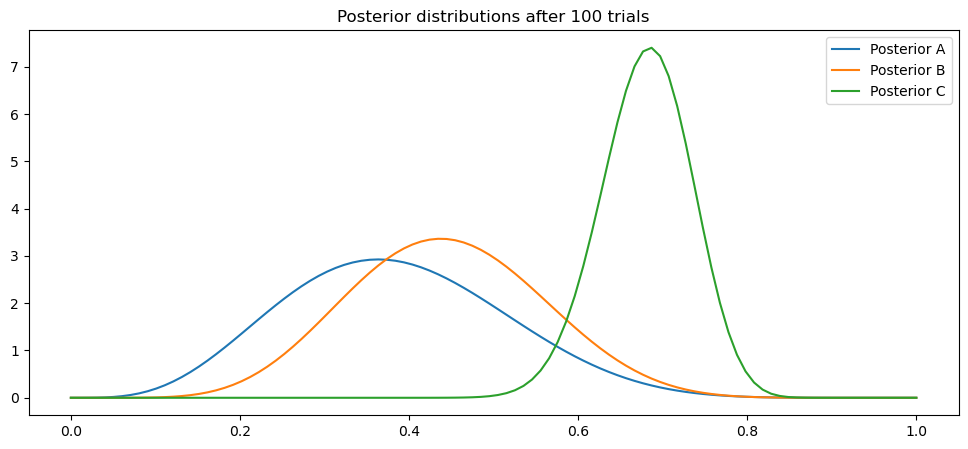

In [15]:
# Visualization of the results

# Assuming prior_A, prior_B, prior_C are the final beta distributions obtained from the simulation
prior_A = priors['A']
prior_B = priors['B']
prior_C = priors['C']

# Plotting the results
plt.figure(figsize=(12, 5))
x = np.linspace(0, 1, 100)
plt.plot(x, prior_A.pdf(x), label='Posterior A')
plt.plot(x, prior_B.pdf(x), label='Posterior B')
plt.plot(x, prior_C.pdf(x), label='Posterior C')
plt.title("Posterior distributions after 100 trials")
plt.legend()
plt.show()